## Agilent array data

This template guides you throught the steps required to get raw Agilent data and preprocess it. 

The raw data is not provided so in order to reproduce this notebook you need to use your own data.

In [1]:
library(limma)

In [2]:
basedir <- "/mnt/data/input/myAgilentData" # no Agilent data provided
setwd(basedir)

In [3]:
targets <- readTargets()

Use LIMMA's read.maimages function to load your data into an RGList object. Remember to set the path to the location where your Agilent FE text files are stored.

In [4]:
x <- read.maimages(targets, source="agilent", green.only=TRUE)
# returns a EListRaw object in which the expression values are unlogged (x$E)

Read US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6.txt 
Read US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_1_3-N5.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_1_4-N7.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_2_1-N2.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_2_2-N4.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6.txt 
Read US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8.txt 
Read US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1.tx

In [5]:
summary(x$E) #intensity.data

 US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1
 Min.   :    59.0                                
 1st Qu.:    87.5                                
 Median :   110.0                                
 Mean   :  2333.1                                
 3rd Qu.:   398.1                                
 Max.   :401669.0                                
 US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3
 Min.   :    64.0                                
 1st Qu.:    88.5                                
 Median :   110.0                                
 Mean   :  2108.3                                
 3rd Qu.:   372.0                                
 Max.   :336485.0                                
 US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5
 Min.   :    61                                  
 1st Qu.:    84                                  
 Median :   105                                  
 Mean   :  2230                                  
 3rd Qu.:   380                                  


In [6]:
dim(x$E)
head(x$E)

[1] 62976    24

US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1,US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3,US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5,US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7,US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2,US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4,US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6,US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8,US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1,US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3,...,US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6,US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8,US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1,US10313828_252800422372_S01_GE1_107_Sep09_1_2-V3,US10313828_252800422372_S01_GE1_107_Sep09_1_3-V5,US10313828_252800422372_S01_GE1_107_Sep09_1_4-V7,US10313828_252800422372_S01_GE1_107_Sep09_2_1-V2,US10313828_252800422372_S01_GE1_107_Sep09_2_2-V4,US10313828_252800422372_S01_GE1_107_Sep09_2_3-V6,US10313828_252800422372_S01_GE1_107_Sep09_2_4-V8
29827.5,39285.5,44371.0,64453.0,38576.0,49477.5,104024.0,56687.0,47771.0,31164.0,...,45098.5,28339.0,30603.0,40503,29079.0,26585.0,23267.0,39424.0,24199,40278.5
80.0,83.0,80.5,83.5,75.0,87.0,77.5,79.0,71.5,81.0,...,66.0,75.0,74.5,78,81.0,76.0,71.0,82.0,77,78.0
79.0,86.0,85.5,83.5,69.5,78.0,77.0,81.5,67.5,85.0,...,80.5,79.5,78.0,70,87.5,80.5,70.0,93.5,76,75.5
1043.0,1588.0,1180.5,3137.0,891.0,2169.5,2157.0,1220.0,672.0,578.5,...,2823.0,719.5,1375.0,389,974.5,285.0,486.5,2348.5,477,2042.0
101.0,132.5,114.0,127.5,92.0,115.0,118.5,122.0,89.0,102.0,...,119.0,97.0,106.0,92,96.0,78.0,78.5,156.0,79,129.0
203.0,210.0,189.0,185.5,127.5,224.0,291.0,149.0,275.0,167.0,...,285.0,107.0,180.0,154,185.5,90.0,105.0,247.0,117,160.5


In [7]:
dim(x$genes)
head(x$genes)

[1] 62976    10

Row,Col,Start,Sequence,ProbeUID,ControlType,ProbeName,GeneName,SystematicName,Description
1,1,0,,0,1,GE_BrightCorner,GE_BrightCorner,GE_BrightCorner,
1,2,0,,1,1,DarkCorner,DarkCorner,DarkCorner,
1,3,0,,1,1,DarkCorner,DarkCorner,DarkCorner,
1,4,209,GTATGGGGAGATTGAAGAGATGAATGTGTGCGACAACCTTGGGGACCACGTCGTGGGCAA,3,0,A_23_P326296,U2AF1L4,NM_144987,"ref|Homo sapiens U2 small nuclear RNA auxiliary factor 1-like 4 (U2AF1L4), transcript variant 2, mRNA [NM_144987]"
1,5,973,AAATTGCAGTAGCTTGAGGTTAACATTTAGACTTGGAACAATGCTAAAGGAAAGCATTTG,5,0,A_24_P287941,PSMC3IP,NM_013290,"ref|Homo sapiens PSMC3 interacting protein (PSMC3IP), transcript variant 1, mRNA [NM_013290]"
1,6,1012,TGCACCTACTCTGTAACCTAACTGCGATTTATAAAATGAAACAATCTCTTCTAATTTGGC,7,0,A_24_P325046,ZCCHC7,ENST00000322831,"ens|zinc finger, CCHC domain containing 7 [Source:HGNC Symbol;Acc:HGNC:26209] [ENST00000322831]"


In [8]:
str(x)

Formal class 'EListRaw' [package "limma"] with 1 slot
  ..@ .Data:List of 6
  .. ..$ : num [1:62976, 1:24] 29828 80 79 1043 101 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:24] "US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1" "US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3" "US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5" "US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7" ...
  .. ..$ : num [1:62976, 1:24] 35 35 36 36 36 36 36 36 36 36 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:24] "US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1" "US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3" "US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5" "US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7" ...
  .. ..$ :'data.frame':	24 obs. of  1 variable:
  .. .. ..$ FileName: chr [1:24] "US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1.txt" "US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3.txt" "US10313828_

* **Background correction and Normalization between the arrays**

In [34]:
?backgroundCorrect
#The offset can be used to add a constant to the intensities before log-transforming, so that the log-ratios are shrunk towards zero at the lower intensities. 
#This may eliminate or reverse the usual 'fanning' of log-ratios at low intensities associated with local background subtraction.

In [9]:
data.corrected <- backgroundCorrect(x, method="normexp", offset=16)

Array 1 corrected
Array 2 corrected
Array 3 corrected
Array 4 corrected
Array 5 corrected
Array 6 corrected
Array 7 corrected
Array 8 corrected
Array 9 corrected
Array 10 corrected
Array 11 corrected
Array 12 corrected
Array 13 corrected
Array 14 corrected
Array 15 corrected
Array 16 corrected
Array 17 corrected
Array 18 corrected
Array 19 corrected
Array 20 corrected
Array 21 corrected
Array 22 corrected
Array 23 corrected
Array 24 corrected


In [10]:
head(data.corrected$E)

US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1,US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3,US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5,US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7,US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2,US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4,US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6,US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8,US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1,US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3,...,US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6,US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8,US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1,US10313828_252800422372_S01_GE1_107_Sep09_1_2-V3,US10313828_252800422372_S01_GE1_107_Sep09_1_3-V5,US10313828_252800422372_S01_GE1_107_Sep09_1_4-V7,US10313828_252800422372_S01_GE1_107_Sep09_2_1-V2,US10313828_252800422372_S01_GE1_107_Sep09_2_2-V4,US10313828_252800422372_S01_GE1_107_Sep09_2_3-V6,US10313828_252800422372_S01_GE1_107_Sep09_2_4-V8
29784.72589,39239.47732,44328.01,64412.93972,38532.02730,49434.89653,103988.01341,56644.16278,47744.70342,31131.87044,...,45066.45902,28302.75086,30574.25391,40469.43331,29040.25069,26547.79631,23239.13037,39398.33446,24167.50742,40235.9674
37.22589,35.97732,37.51,42.43972,29.02730,44.39653,41.51341,35.16278,45.20342,48.87044,...,32.95902,37.75086,44.75391,44.43331,43.25069,38.79631,42.13037,55.33446,44.50742,34.4674
35.22589,38.97732,41.51,42.43972,22.52732,35.39653,41.01341,37.66278,40.20342,52.87044,...,47.45902,41.25086,48.25391,36.43331,49.75069,43.29631,40.13037,66.83446,43.50742,31.9674
999.22589,1540.97732,1137.51,3095.93972,844.02730,2126.89653,2121.01341,1177.16278,644.70342,546.37044,...,2789.95902,681.25086,1344.25391,354.43331,936.75069,246.79631,456.63037,2321.83446,444.50742,1998.4674
57.22589,85.47732,70.01,86.43972,46.02730,72.39653,82.51341,79.16278,61.70342,69.37044,...,84.95902,58.75086,75.25391,57.43331,59.25069,39.79631,48.63037,128.33446,46.50742,85.4674
159.22589,161.97732,145.01,144.43972,82.52730,181.39653,254.01341,106.16278,246.70342,134.87044,...,250.95902,68.75086,149.25391,119.43331,147.75069,51.79631,75.13037,219.33446,84.50742,116.9674


In [11]:
data.normalized <- normalizeBetweenArrays(data.corrected$E, method="quantile")

In [12]:
head(data.normalized)

US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1,US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3,US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5,US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7,US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2,US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4,US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6,US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8,US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1,US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3,...,US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6,US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8,US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1,US10313828_252800422372_S01_GE1_107_Sep09_1_2-V3,US10313828_252800422372_S01_GE1_107_Sep09_1_3-V5,US10313828_252800422372_S01_GE1_107_Sep09_1_4-V7,US10313828_252800422372_S01_GE1_107_Sep09_2_1-V2,US10313828_252800422372_S01_GE1_107_Sep09_2_2-V4,US10313828_252800422372_S01_GE1_107_Sep09_2_3-V6,US10313828_252800422372_S01_GE1_107_Sep09_2_4-V8
37234.15938,55886.22188,58359.09688,46595.97188,60097.47188,40066.90938,53196.93022,64517.09688,38892.55522,71746.03438,...,32054.97188,49154.88855,24999.45105,94165.43022,28787.97188,105446.07605,46369.05522,24531.22188,33825.20105,37888.24272
39.11772,37.99272,40.78438,42.22188,30.36772,43.03438,37.32605,37.24272,41.59688,61.97188,...,32.36772,38.36772,43.03438,67.72188,48.74272,56.94063,43.07605,47.09688,42.59688,36.51355
36.97188,41.30522,45.70105,42.22188,23.56572,34.15938,36.84688,39.84688,37.80522,71.18022,...,45.70105,42.45105,45.72188,45.03438,57.43022,75.99272,40.47188,57.09688,41.13855,33.63855
1238.65938,2174.58647,1514.50313,2069.20105,1470.66980,1704.36772,1071.93022,1340.40938,538.20105,1505.15938,...,2183.95105,1140.91980,1001.05522,1088.57605,960.86772,1041.09688,914.59688,1631.32605,655.28438,1735.48230
62.65938,100.97188,81.76355,75.68022,50.03438,69.49272,67.53438,86.65938,53.28438,113.27397,...,79.18022,65.47188,66.28438,113.78438,70.03438,60.72188,53.99272,104.64897,45.51355,84.15938
187.43022,206.12813,176.53438,115.40938,110.68022,159.09688,161.20105,116.63855,205.34688,304.76355,...,218.35730,79.20105,121.07605,334.24272,164.40938,119.99272,111.30522,171.45105,107.80522,109.36772


* **Log transformation**

In [13]:
data.log<-log2(data.normalized)

In [14]:
final.data=data.corrected

In [15]:
final.data$E<-data.log
head(final.data$E)

US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1,US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3,US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5,US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7,US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2,US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4,US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6,US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8,US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1,US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3,...,US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6,US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8,US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1,US10313828_252800422372_S01_GE1_107_Sep09_1_2-V3,US10313828_252800422372_S01_GE1_107_Sep09_1_3-V5,US10313828_252800422372_S01_GE1_107_Sep09_1_4-V7,US10313828_252800422372_S01_GE1_107_Sep09_2_1-V2,US10313828_252800422372_S01_GE1_107_Sep09_2_2-V4,US10313828_252800422372_S01_GE1_107_Sep09_2_3-V6,US10313828_252800422372_S01_GE1_107_Sep09_2_4-V8
15.184339,15.770205,15.832670,15.507918,15.875017,15.290124,15.699055,15.977394,15.247206,16.130611,...,14.968261,15.585047,14.609609,16.522910,14.813179,16.686146,15.500875,14.582331,15.045811,15.209463
5.289750,5.247651,5.349945,5.399919,4.924466,5.427418,5.222111,5.218886,5.378403,5.953542,...,5.016484,5.261821,5.427418,6.081550,5.607115,5.831387,5.428814,5.557560,5.412676,5.190360
5.208357,5.368252,5.514155,5.399919,4.558618,5.094210,5.203471,5.316395,5.240513,6.153404,...,5.514155,5.407728,5.514813,5.492955,5.843738,6.247789,5.338848,5.835340,5.362419,5.072044
10.274564,11.086525,10.564629,11.014858,10.522258,10.735021,10.065995,10.388458,9.072001,10.555701,...,11.092725,10.155982,9.967306,10.088226,9.908194,10.023889,9.836992,10.671829,9.355977,10.761121
5.969459,6.657810,6.353386,6.241844,5.644848,6.118790,6.077550,6.437284,5.735641,6.823673,...,6.307068,6.032804,6.050597,6.830159,6.129991,5.924145,5.754693,6.709414,5.508224,6.395052
7.550210,7.687398,7.463805,6.850617,6.790254,7.313762,7.332717,6.865901,7.681919,8.251547,...,7.770547,6.307448,6.919770,8.384752,7.361149,6.906803,6.798377,7.421653,6.752283,6.773043


* **Use the avereps function to average replicate spots.**

In [16]:
#y.ave <- avereps(y, ID=y$genes$ProbeName)
final.data.ave = new("MAList", list(targets=final.data$targets, genes=final.data$genes, source=final.data$source, M=final.data$E, A=final.data$E))
final.data.ave.avg <- avereps(final.data.ave, ID=final.data.ave$genes$ProbeName)

In [17]:
head(final.data.ave.avg$M)

,US10313828_252800422368_S01_GE1_107_Sep09_1_1-A1,US10313828_252800422368_S01_GE1_107_Sep09_1_2-A3,US10313828_252800422368_S01_GE1_107_Sep09_1_3-A5,US10313828_252800422368_S01_GE1_107_Sep09_1_4-A7,US10313828_252800422368_S01_GE1_107_Sep09_2_1-A2,US10313828_252800422368_S01_GE1_107_Sep09_2_2-A4,US10313828_252800422368_S01_GE1_107_Sep09_2_3-A6,US10313828_252800422368_S01_GE1_107_Sep09_2_4-A8,US10313828_252800422371_S01_GE1_107_Sep09_1_1-N1,US10313828_252800422371_S01_GE1_107_Sep09_1_2-N3,...,US10313828_252800422371_S01_GE1_107_Sep09_2_3-N6,US10313828_252800422371_S01_GE1_107_Sep09_2_4-N8,US10313828_252800422372_S01_GE1_107_Sep09_1_1-V1,US10313828_252800422372_S01_GE1_107_Sep09_1_2-V3,US10313828_252800422372_S01_GE1_107_Sep09_1_3-V5,US10313828_252800422372_S01_GE1_107_Sep09_1_4-V7,US10313828_252800422372_S01_GE1_107_Sep09_2_1-V2,US10313828_252800422372_S01_GE1_107_Sep09_2_2-V4,US10313828_252800422372_S01_GE1_107_Sep09_2_3-V6,US10313828_252800422372_S01_GE1_107_Sep09_2_4-V8
GE_BrightCorner,15.456968,15.768002,16.050559,15.128661,16.253412,15.217802,15.588320,15.531170,15.478654,15.773106,...,15.152505,15.843536,14.951548,16.400905,15.091161,16.498055,15.524366,14.895328,15.377167,14.906341
DarkCorner,5.272087,5.137791,5.206395,5.096579,5.271839,5.286049,5.198251,4.908682,5.383215,5.584744,...,5.317419,5.105659,5.377349,5.559889,5.508525,5.554382,5.413798,5.278041,5.218685,4.907143
A_23_P326296,10.274564,11.086525,10.564629,11.014858,10.522258,10.735021,10.065995,10.388458,9.072001,10.555701,...,11.092725,10.155982,9.967306,10.088226,9.908194,10.023889,9.836992,10.671829,9.355977,10.761121
A_24_P287941,5.969459,6.657810,6.353386,6.241844,5.644848,6.118790,6.077550,6.437284,5.735641,6.823673,...,6.307068,6.032804,6.050597,6.830159,6.129991,5.924145,5.754693,6.709414,5.508224,6.395052
A_24_P325046,7.550210,7.687398,7.463805,6.850617,6.790254,7.313762,7.332717,6.865901,7.681919,8.251547,...,7.770547,6.307448,6.919770,8.384752,7.361149,6.906803,6.798377,7.421653,6.752283,6.773043
A_23_P200404,9.060151,8.984945,8.126013,9.298141,9.605896,8.240702,8.166396,8.831678,8.853209,10.508313,...,9.582410,8.740585,8.433843,9.342739,8.783005,8.453005,8.549546,9.354256,7.884759,8.877667


In [18]:
dim(final.data$E)
dim(final.data.ave.avg$M)

[1] 62976    24

[1] 42545    24

In [19]:
write.table(final.data.ave.avg$M,"intensity_data_processed")

In [20]:
class(final.data.ave.avg)

[1] "MAList"
attr(,"package")
[1] "limma"

In [21]:
save(final.data.ave.avg,file="MAList-object")

### MA plot

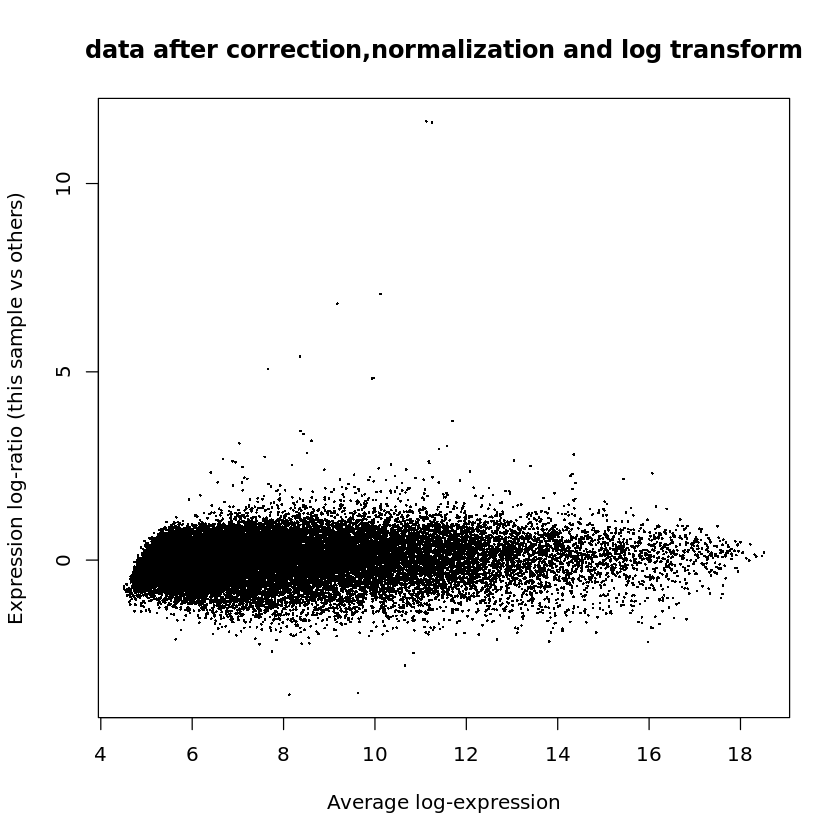

In [32]:
plotMA(final.data.ave.avg$M,main="data after correction,normalization and log transform")